In [1]:
import numpy as np  
from numpy import newaxis

In [3]:
# Creating some random data with labels:
data1 = np.hstack((np.random.randn(100,3) + [3,3,3],(np.ones(100))[:,newaxis]))
data2 = np.hstack((np.random.randn(100,3) + [-3,-3,-3],(2 * np.ones(100))[:,newaxis]))
data3 = np.hstack((np.random.randn(100,3) + [-3,3,3],(3 * np.ones(100))[:,newaxis]))
data4 = np.hstack((np.random.randn(100,3) + [-3,-3,3],(4 * np.ones(100))[:,newaxis]))
data5 = np.hstack((np.random.randn(100,3) + [3,3,-3],(5 * np.ones(100))[:,newaxis]))
data = np.concatenate((data1,data2,data3,data4,data5))
np.random.shuffle(data)
data.shape  

(500, 4)

In [4]:
# Applying spectral clustering
from sklearn.cluster import SpectralClustering
spectral = SpectralClustering(n_clusters=5, eigen_solver='arpack',affinity='nearest_neighbors').fit(data[:,:3])

<IPython.core.display.Javascript object>


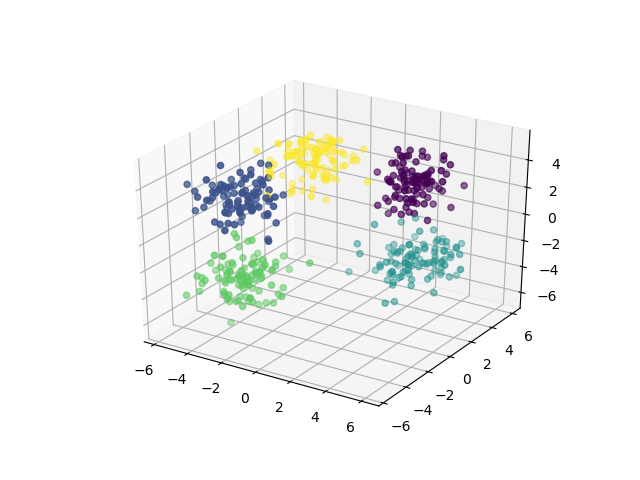

In [7]:
# Displaying results of spectral classification
%matplotlib notebook
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(data[:,0], data[:,1], data[:,2], c=spectral.labels_)
plt.show()

In [8]:
# Verifying results with rand index
from sklearn import metrics
metrics.adjusted_rand_score(spectral.labels_, data[:,3])

0.9850059376799895

/home/jeslava/anaconda3/lib/python3.7/site-packages/sklearn/manifold/spectral_embedding_.py:235: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph is not fully connected, spectral embedding"


<IPython.core.display.Javascript object>


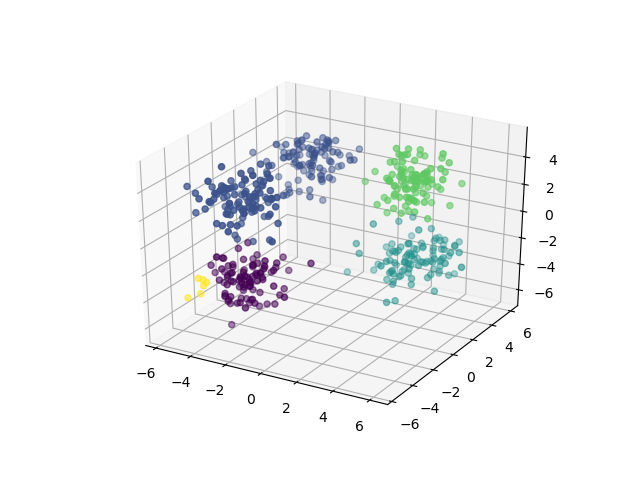

In [11]:
# trying now with a different number for n_neighbors:
spectral1 = SpectralClustering(n_clusters=5, eigen_solver='arpack',n_neighbors=4,affinity='nearest_neighbors').fit(data[:,:3])
%matplotlib notebook
fig1 = plt.figure()
ax1 = fig1.add_subplot(111, projection='3d')
ax1.scatter(data[:,0], data[:,1], data[:,2], c=spectral1.labels_)
plt.show()
# We can see that with n_neighbors = 4 (less than 5 that was initially the number of clusters)
# it can not cluster correctly

<IPython.core.display.Javascript object>


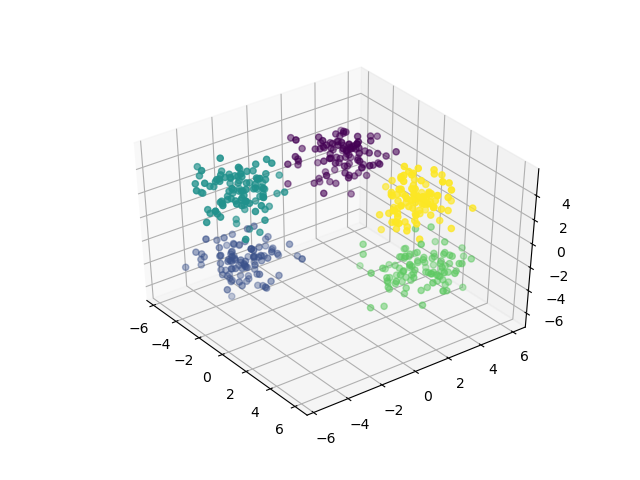

In [12]:
# trying now with a rbf affinity:
spectral2 = SpectralClustering(n_clusters=5, eigen_solver='arpack',affinity='rbf', gamma = 1).fit(data[:,:3])
%matplotlib notebook
fig2 = plt.figure()
ax2 = fig2.add_subplot(111, projection='3d')
ax2.scatter(data[:,0], data[:,1], data[:,2], c=spectral2.labels_)
plt.show()

<IPython.core.display.Javascript object>


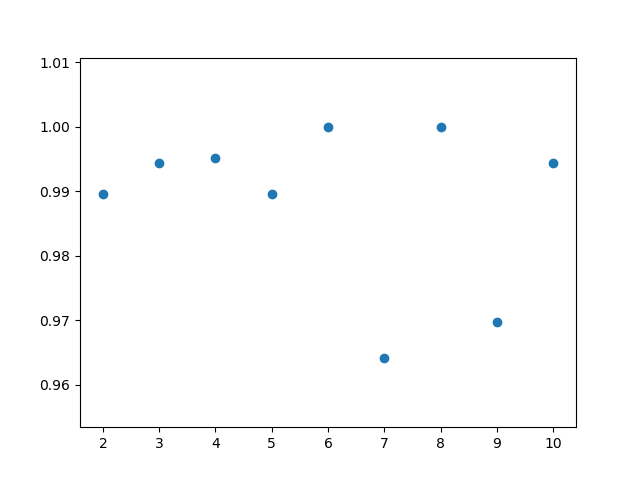

In [44]:
# Now we are going to try to cluster random data:
# generate 500 random points
data_points = np.random.uniform(0, 1, (500, 3))
# kmeans with init random
nbr_iter = 10
spectral3 = SpectralClustering(n_clusters=5, eigen_solver='arpack',affinity='rbf', gamma = 1).fit(data_points[:,:3])
labels_res = spectral3.labels_
rand_indxs = []
for i in range(nbr_iter - 1):
    spectral3 = SpectralClustering(n_clusters=5, eigen_solver='arpack',affinity='rbf', gamma = 1).fit(data_points[:,:3])
    rand_indxs.append( metrics.adjusted_rand_score(spectral3.labels_, labels_res) )
    labels_res = spectral3.labels_
    
fig4 = plt.figure()
ax4 = fig4.add_subplot(111)
ax4.scatter([i for i in range(2, nbr_iter+1)], rand_indxs)
plt.show()  
# we can see that rand index is stable 

<IPython.core.display.Javascript object>


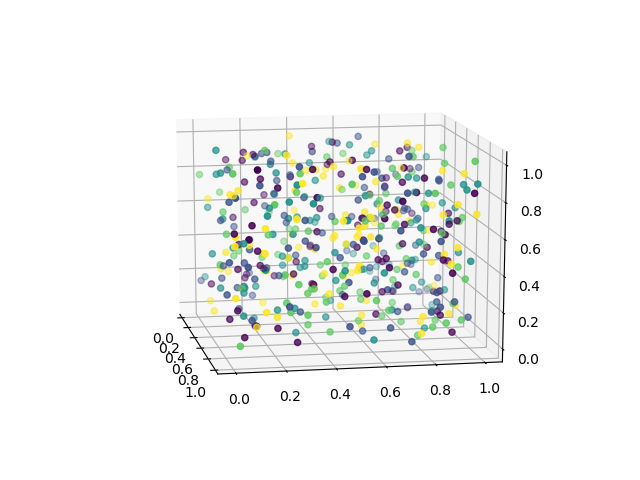

In [14]:
# Visualizing spectral clustering of random data:
fig5 = plt.figure()
ax5 = fig5.add_subplot(111, projection='3d')
ax5.scatter(data_points[:,0], data_points[:,1], data_points[:,2], c=spectral3.labels_)
plt.show()
# As with k-means, the clustering is not done correctly

In [15]:
# Working with texture data
textures = np.loadtxt('texture.dat')
np.random.shuffle(textures)
spectral4 = SpectralClustering(n_clusters=11, eigen_solver='arpack',affinity='nearest_neighbors').fit(textures[:,:40])
metrics.adjusted_rand_score(spectral4.labels_, textures[:,40])

/home/jeslava/anaconda3/lib/python3.7/site-packages/sklearn/manifold/spectral_embedding_.py:235: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph is not fully connected, spectral embedding"


0.5922375400799584

In [51]:
# Applying lda before spectral clustering:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
lda = LinearDiscriminantAnalysis(n_components = 10)
lda.fit(textures[:,:40],textures[:,40])

/home/jeslava/anaconda3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


LinearDiscriminantAnalysis(n_components=10, priors=None, shrinkage=None,
                           solver='svd', store_covariance=False, tol=0.0001)

In [52]:
texture_proj = lda.transform(textures[:,:40])

In [53]:
# Now we apply spectral clustering to data projected to LDA axis:
spectral5 = SpectralClustering(n_clusters=11, eigen_solver='arpack', gamma=0.1, affinity='rbf').fit(texture_proj)
metrics.adjusted_rand_score(spectral5.labels_, textures[:,40])

0.9908596354969673

<IPython.core.display.Javascript object>


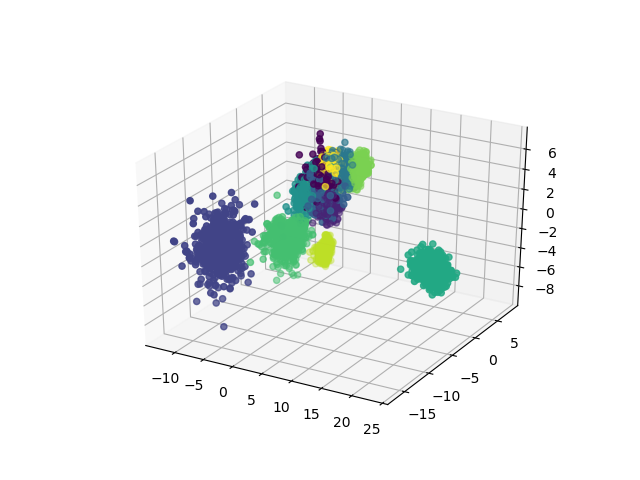

In [50]:
# Visualizing spectral clustering after LDA:
fig6 = plt.figure()
ax6 = fig6.add_subplot(111, projection='3d')
ax6.scatter(texture_proj[:,0], texture_proj[:,1], texture_proj[:,2], c=spectral5.labels_)
plt.show()

In [ ]:
# See https://scikit-learn.org/stable/modules/clustering.html